## Question 1

In [1]:
import numpy as np

A=np.array([[1, 2, 5, 8, 13, 15, 12],[1, 4, 7, 8, 6, 5, 1.5]])
print("La matrice A des points de controle :\n")
print(A)

La matrice A des points de controle :

[[ 1.   2.   5.   8.  13.  15.  12. ]
 [ 1.   4.   7.   8.   6.   5.   1.5]]


In [2]:
import matplotlib.pyplot as plt
from scipy.special import binom

#f est la frequence de t 
f=100
t = np.linspace(0,1,f)

def B(n, k, t):
    b = (binom (n, k)) * (t**k) * (1-t)**(n-k)    
    return b

C=np.copy(A)

def G(t, C) :
    n=np.size(C[0,:])-1
    N=t.size
    H=np.zeros([2,N])
    for i in range(n+1) :
        H[0,:] = H[0,:] + C[0, i] * B(n, i, t)
        H[1,:] = H[1,:] + C[1, i] * B(n, i, t)
    return H

H=G(t,C)

plt.plot(H[0,:],H[1,:],label="Courbe de Bezier")
plt.plot(A[0,:],A[1,:],"-*",label="points de controle")
plt.title("Courbe de Bezier et ses points de controle")
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

## Question 2

In [3]:
print("c0 :")
print((A[0,0],A[1,0]))
print("gamma en 0")
print((H[0,0],H[1,0]))
print("\n\n")
print("cn :")
print((A[0,6],A[1,6]))
print("gamma en 100")
print((H[0,t.size-1],H[1,t.size-1]))

c0 :
(1.0, 1.0)
gamma en 0
(1.0, 1.0)



cn :
(12.0, 1.5)
gamma en 100
(12.0, 1.5)


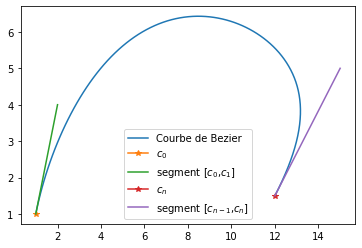

In [4]:
#Extraction du segment c0-c1
c0_c1=A[:,0:2]
#Extraction du segment c5-c6
c5_c6=A[:,5:7]
plt.plot(H[0,:],H[1,:],label="Courbe de Bezier")
plt.plot(A[0,0],A[1,0],"-*",label=r'$c_0$')
plt.plot(c0_c1[0,:],c0_c1[1,:],label=r'segment [$c_0$,$c_1$]')
plt.plot(A[0,6],A[1,6],"-*",label=r'$c_n$')
plt.plot(c5_c6[0,:],c5_c6[1,:],label=r'segment [$c_{n-1}$,$c_n$]')
plt.legend()
plt.show()

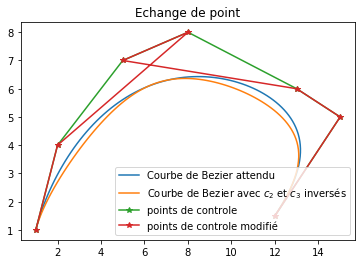

In [5]:
#Cbis est une copie de A avec c2 et c3 interverties
Cbis=np.copy(A)
temp=Cbis[:,3].copy()
Cbis[:,3]=C[:,2]
Cbis[:,2]=temp

Hbis=G(t,Cbis)

plt.plot(H[0,:],H[1,:],label="Courbe de Bezier attendu")
plt.plot(Hbis[0,:],Hbis[1,:],label=r'Courbe de Bezier avec $c_2$ et $c_3$ inversés')
plt.plot(C[0,:],C[1,:],"-*",label="points de controle")
plt.plot(Cbis[0,:],Cbis[1,:],"-*",label="points de controle modifié")
plt.title("Echange de point")
plt.legend()
plt.show()

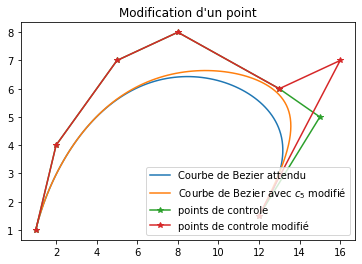

In [6]:
#Les valeurs de c5 ont été modifiées
Cprim=np.copy(A)
Cprim[0,5]=16
Cprim[1,5]=7

Hprim=G(t,Cprim)

plt.plot(H[0,:],H[1,:],label="Courbe de Bezier attendu")
plt.plot(Hprim[0,:],Hprim[1,:],label=r'Courbe de Bezier avec $c_5$ modifié')
plt.plot(C[0,:],C[1,:],"-*",label="points de controle")
plt.plot(Cprim[0,:],Cprim[1,:],"-*",label="points de controle modifié")
plt.title("Modification d'un point")
plt.legend()
plt.show()

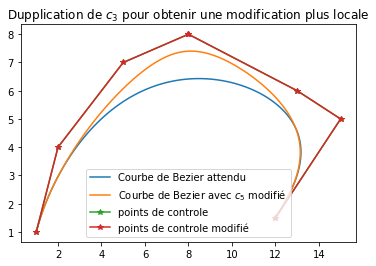

In [7]:
C2nde=np.copy(A)
for i in range (2) :
    C2nde=np.insert(C2nde,3,Cprim[:,3], axis=1)
    
H2nde=G(t,C2nde)

plt.plot(H[0,:],H[1,:],label="Courbe de Bezier attendu")
plt.plot(H2nde[0,:],H2nde[1,:],label=r'Courbe de Bezier avec $c_5$ modifié')
plt.plot(C[0,:],C[1,:],"-*",label="points de controle")
plt.plot(C2nde[0,:],C2nde[1,:],"-*",label="points de controle modifié")
plt.title("Dupplication de $c_3$ pour obtenir une modification plus locale")
plt.legend()
plt.show()

## Question 3

### 3.a)

Tout d'abord, montrons que 
\begin{align*} \sum_{k=0}^{n}B_{k}^{n}(t)=1 \end{align*}

D'aprés la formule du binôme de Newton, on a : 
\begin{align*}(a+b)^n=\sum_{k=0}^{n}C_{k}^{n} a^n b^{n-k}\end{align*}   

où    
\begin{align*}C_{k}^{n}= \dbinom{n}{k} =\frac{n!}{k!(n-k)!}\end{align*}

Nous avons : 
\begin{align*}\sum_{k=0}^{n}C_{k}^{n} a^n b^{n-k} = \sum_{k=0}^{n}C_{k}^{n} t^n(1-t)^{n-k}\end{align*}

Par identification nous obtenons donc : 
\begin{align*}\sum_{k=0}^{n}C_{k}^{n} t^n(1-t)^{n-k}=(t + (1-t) )^{n} = (t + 1 - t)^{n} = 1^{n} = 1\end{align*}

En remarquant que $ \sum_{k=0}^{n}B_{k}^{n}(t)=\sum_{k=0}^{n} \dbinom{n}{k} t^n(1-t)^{n-k}$ correspond a la formule d'une loi binômiale, où $P(X=k) = \dbinom{n}{k} t^n(1-t)^{n-k}$ où t correspond à la probabilité d'un succés, ce qui nous donne que $ \sum_{k=0}^{n}B_{k}^{n}(t)=\sum_{k=0}^{n} P(X=k)$
nous pourrons raisonner de façon probabiliste pour les questions suivantes.



Montrons que : 
\begin{align*} \sum_{k=0}^{n}kB_{k}^{n}(t) = nt \end{align*}

On a  :
\begin{align*} \sum_{k=0}^{n}kB_{k}^{n}(t) = 0*P(X=0) + 1*P(X=1) + ... + n*P(X=n) \end{align*}

Or nous pouvons voir que cela correspond a la formule de l'espérance, de plus nous connaissons la valeur de l'espérance d'une loi binômiale 

(soit $X$~$B(n, p) => E[X] = np$),  nous avons donc :
\begin{align*} \sum_{k=0}^{n}kB_{k}^{n}(t) = nt  \end{align*}



Montrons que :
\begin{align*} \sum_{k=0}^{n}k(k-1)B_{k}^{n}(t) = n(n-1)t² \end{align*}

Nous avons :
\begin{align*}  \sum_{k=0}^{n}k(k-1)B_{k}^{n}(t) = \sum_{k=0}^{n}(k² -k)B_{k}^{n}(t)  \end{align*}
\begin{align*}   = \sum_{k=0}^{n}k²B_{k}^{n}(t) - \sum_{k=0}^{n}kB_{k}^{n}(t)\end{align*}
\begin{align*}  = E[X²] - E[X]  \end{align*}

Or nous connaissons déja $E[X]=nt$, calculons $E[X²]$;

D'aprés la formule de la variance générale et la variance connue d'une loi binômiale (soit $X$~$B(n, p) => Var(X) = np(1-p)$) vaut nous avons :

\begin{align*} Var(X) = E[X²] - E²[X] = nt(1-t)\end{align*}

\begin{align*}  \iff Var(X) + E²[X] = E[X²] = nt(1-t) + (nt)² \end{align*}

En reprenant la formule de départ nous obtenons :

\begin{align*}  \sum_{k=0}^{n}k(k-1)B_{k}^{n}(t) = E[X²] - E[X]  \end{align*}
\begin{align*}  \sum_{k=0}^{n}k(k-1)B_{k}^{n}(t) = [nt(1-t)+(nt)²]-nt  \end{align*}
\begin{align*}  \sum_{k=0}^{n}k(k-1)B_{k}^{n}(t) = nt(1-t+nt-1)  \end{align*}
\begin{align*}  \sum_{k=0}^{n}k(k-1)B_{k}^{n}(t) = nt(nt-t) = n(n-1)t²  \end{align*}




### 3.b

Nous savons que $E[X] = nt$ et $B_{k}^{n}(t) = P(X=k) $

Donc :
\begin{align*}  \sum_{k=0}^{n}(k-nt)²B_{k}^{n}(t) = \sum_{k=0}^{n}(k-E[X])²P(X=k)  \end{align*}

Or cela correspond a la formule de la variance (soit $X$~$B(n, p) => Var(X) = np(1-p)$, ici $p=t$), d'où : 
\begin{align*}  \sum_{k=0}^{n}(k-E[X])²P(X=k) = Var(X) = nt(1-t) \end{align*}


### 3.c

D'aprés le théorème 1 on a :
$ f(t) - B_n(f)(t) = f(t) - \sum_{k=0}^{n}f\left( \frac{k}{n}\right) B_{k}^{n}(t) $

Or puisque f(t) ne dépend pas de k ( ou de n ), on a :
$ f(t) - B_n(f)(t) = \sum_{k=0}^{n}\left(f(t) - f\left( \frac{k}{n}\right)\right) B_{k}^{n}(t) $

### 3.d

Le Théorème des accroissements finis nous dit que pour toute fonction réelle d'une variable réelle f : [a, b] → ℝ (a et b réels tels que a < b), supposée continue sur l'intervalle fermé [a, b] et dérivable sur l'intervalle ouvert ]a, b[, il existe un réel c dans ]a, b[ vérifiant :

$\frac{f(b)-f(a)}{b-a} \le f'(c)$, ce qui implique que $\frac{|f(b)-f(a)|}{|b-a|}\le |f'(c)| $

Sachant que $M = sup_{t \in [0,1]}$, on a : $\frac{|f(b)-f(a)|}{|b-a|}\le |f'(c)| \le M $

D'où : $|f(b)-f(a)|\le  M |b-a|$ 

De plus, on a vu que : $f(t)-B_n(f)(t) = \sum_{k=0}^{n} \left( f(t) - f(\frac{k}{n}) \right)B_{k}^{n}(t)$

En applicant le TAF a $f(t)-f(\frac{k}{n})$ on obtient :
$ \left| f(t)-f(\frac{k}{n}) \right| \le M |t-\frac{k}{n}| $

D'où : 
$|f(t) - B_{n}(f)(t)| \le  M\sum_{k=0}^{n} |t - \frac{k}{n}|B_{k}^{n}(t)$

### 3.e

L'inégalité de Cauchy-Schwarz nous dit que :
$\left|\sum _{{i=1}}^{n}x_{{i}}y_{{i}}\right|\leqslant \left(\sum _{{i=1}}^{n}x_{{i}}^{{2}}\right)^{{1/2}}\left(\sum _{{i=1}}^{n}y_{{i}}^{{2}}\right)^{{1/2}}$


On cherche a mettre l'inégalité de la question précédante sous une forme correspondante a l'inégalité de Cauchy-Schwarz :
\begin{align*} |f(t) - B_{n}(f)(t)| \le  M\sum_{k=0}^{n} |t - \frac{k}{n}|B_{k}^{n}(t) \end{align*}
\begin{align*}  M\sum_{k=0}^{n} |t - \frac{k}{n}|B_{k}^{n}(t) \le \frac{M}{n} \sum_{k=0}^{n} |nt - k| B_{k}^{n}(t) =
\frac{M}{n} \sum_{k=0}^{n} |nt - k| \sqrt{B_{k}^{n}(t)}\sqrt{B_{k}^{n}(t)}  \end{align*}


En appliquant Cauchy-Schwarz avec $x_i = |nt - k| \sqrt{B_{k}^{n}(t)}$ et $y_i = \sqrt{B_{k}^{n}(t)}$  on obtient :
\begin{align*}  |f(t) - B_{n}(f)(t)| \le \frac{M}{n} \sum_{k=0}^{n} |nt - k| \sqrt{B_{k}^{n}(t)}\sqrt{B_{k}^{n}(t)} \le \frac{M}{n} \left(\sum_{k=0}^{n} (nt - k)² (\sqrt{B_{k}^{n}(t)})²    \right)^{\frac{1}{2}} \left(\sum_{k=0}^{n} (\sqrt{B_{k}^{n}(t)})²    \right)^{\frac{1}{2}}  \end{align*}


On a donc : 
\begin{align*}  |f(t) - B_{n}(f)(t)| \le  \frac{M}{n} \left(\sum_{k=0}^{n} (nt - k)² {B_{k}^{n}(t)}    \right)^{\frac{1}{2}} \left(\sum_{k=0}^{n} {B_{k}^{n}(t)}    \right)^{\frac{1}{2}}  \end{align*}


Or on a vu dans les questions précédentes ( 3a/3b ) que : $\sum_{k=0}^{n} (nt - k)² {B_{k}^{n}(t)} = nt(1-t)$ et $\sum_{k=0}^{n} {B_{k}^{n}(t)} = 1$


On en déduit donc que :
\begin{align*} |f(t) - B_{n}(f)(t)| \le \frac{M}{n} \sqrt{nt(1-t)} = \frac{M\sqrt{n}}{n} \sqrt{nt(1-t)} = \frac{M}{\sqrt{n}} \sqrt{t(1-t)}  \end{align*}


On a bien donc : 
\begin{align*}  \left| f(t) - B_n(f)(t) \right| \le \frac{M}{\sqrt{n}} \sqrt{t(1-t)}  \end{align*}


L'étude de la fonction 
$ y = \sqrt{t(1-t)}   $
nous dit que :
$ \sqrt{t(1-t)} \le 0,5² \le \frac{1}{2} $, on a donc :


\begin{align*} \left| f(t) - B_n(f)(t) \right| \le \frac{M}{\sqrt{n}} \sqrt{t(1-t)} \le \frac{M}{2\sqrt{n}}   \end{align*}




## Question 4

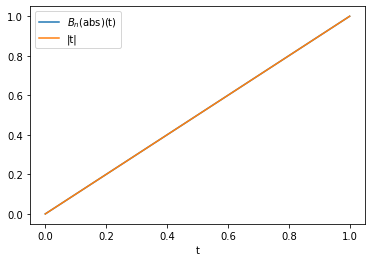

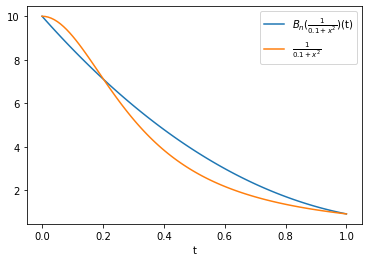

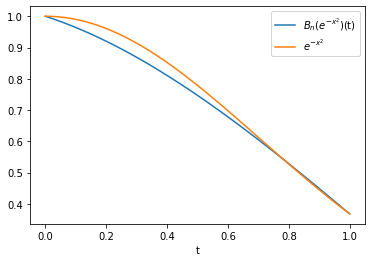

In [8]:
def f2 (x) :
    y = 1/(0.1+x**2)
    return y

def f3 (x) :
    y = np.exp((-1)*x**2)
    return y

def Bern(n,f,t) :
    N=t.size
    H=np.zeros([N])
    for i in range (n+1) :
        H=H+f(i/n)*B(n,i,t)
    return H

n=3

Bf1=Bern(n,abs,t)
plt.plot(t,Bf1,label=r'$B_n$(abs)(t)')
plt.plot(t,abs(t),label="|t|")
plt.xlabel('t')
plt.legend()
plt.show()

Bf2=Bern(n,f2,t)
plt.plot(t,Bf2,label=r'$B_n(\frac{1}{0.1+x^2})$(t)')
plt.plot(t,f2(t),label=r'$\frac{1}{0.1+x^2}$')
plt.xlabel('t')
plt.legend()
plt.show()

Bf3=Bern(n,f3,t)
plt.plot(t,Bf3,label=r'$B_n(e^{-x^2})$(t)')
plt.plot(t,f3(t),label=r'$e^{-x^2}$')
plt.xlabel('t')
plt.legend()
plt.show()


On a montré dans la question 3 que pour n $\in \mathbb{N}$ :

\begin{align*} \left| f(t) - B_n(f)(t) \right| \le \frac{M}{2\sqrt{n}}   \end{align*}

ce qui implique que

\begin{align*} \left| \frac{f(t) - B_{n+1}(f)(t)}{f(t) - B_n(f)(t)} \right| \le \frac{\frac{M}{2\sqrt{n+1}}}{\frac{M}{2\sqrt{n}}} = \frac{M}{2\sqrt{n+1}}*    {\frac{2\sqrt{n}}{M}} \end{align*}

On simplifie le M et le 2 il ne reste plus que 
\begin{align*} \left| \frac{f(t) - B_{n+1}(f)(t)}{f(t) - B_n(f)(t)} \right| \le 
\frac{\sqrt{n}}{\sqrt{n+1}} \end{align*}

Lorsque l'on fait tendre n vers $+\infty$, $\frac{\sqrt{n}}{\sqrt{n+1}}$ donne une forme indeterminé  «$\frac{+\infty}{+\infty}$» que l'on va chercher à lever.

\begin{align*} \frac{\sqrt{n}}{\sqrt{n+1}} = \frac{\sqrt{n}}{\sqrt{n*(1+\frac{1}{n})}} = \frac{\sqrt{n}}{\sqrt{n}*\sqrt{(1+\frac{1}{n})}}\end{align*}

On simlifie le $\sqrt(n)$, il reste plus que : 

\begin{align*} \frac{1}{\sqrt{(1+\frac{1}{n})}}\end{align*}

Lorsque l'on fait tendre n vers $+\infty$ on a:
\begin{align*} \lim_{n \to + \infty} \left( \frac{1}{\sqrt{(1+\frac{1}{n})}} \right)=1\end{align*}

On a donc 

\begin{align*}\left| \frac{f(t) - B_{n+1}(f)(t)}{f(t) - B_n(f)(t)} \right| \le 1\end{align*}

qui implique que la vitesse de convergente est lente

## Question 6

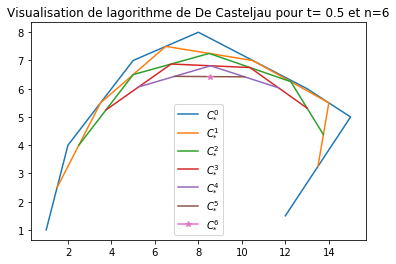

In [9]:
import time

def De_Casteljau_x (C,t) :
    n=np.size(C[0,:])
    H=np.zeros([n,n])
    for i in range (n+1) :
        for j in range (n-i):
            if (i==0):
                H[i,j]=C[0,j]
            else :
                H[i,j]=(1-t)*H[i-1,j]+t*H[i-1,j+1]
    return H

def De_Casteljau_y (C,t) :
    n=np.size(C[1,:])
    H=np.zeros([n,n])
    for i in range (n+1) :
        for j in range (n-i):
            if (i==0):
                H[i,j]=C[1,j]
            else :
                H[i,j]=(1-t)*H[i-1,j]+t*H[i-1,j+1]
    return H

H_x = De_Casteljau_x(C,0.5)
H_y = De_Casteljau_y(C,0.5)

plt.plot(H_x[0,:np.size(H_x[0,:])],H_y[0,:np.size(H_x[0,:])],label=r'$C^{0}_{*}$')
plt.plot(H_x[1,:np.size(H_x[0,:])-1],H_y[1,:np.size(H_y[0,:])-1],label=r'$C^{1}_{*}$')
plt.plot(H_x[2,:np.size(H_x[0,:])-2],H_y[2,:np.size(H_y[0,:])-2],label=r'$C^{2}_{*}$')
plt.plot(H_x[3,:np.size(H_x[0,:])-3],H_y[3,:np.size(H_y[0,:])-3],label=r'$C^{3}_{*}$')
plt.plot(H_x[4,:np.size(H_x[0,:])-4],H_y[4,:np.size(H_y[0,:])-4],label=r'$C^{4}_{*}$')
plt.plot(H_x[5,:np.size(H_x[0,:])-5],H_y[5,:np.size(H_y[0,:])-5],label=r'$C^{5}_{*}$')
plt.plot(H_x[6,:np.size(H_x[0,:])-6],H_y[6,:np.size(H_y[0,:])-6],"-*",label=r'$C^{6}_{*}$')
plt.title(r'Visualisation de lagorithme de De Casteljau pour t= 0.5 et n=6')
plt.legend()
plt.show()

In [10]:
start = time.perf_counter()
H=G(t,C)
end = time.perf_counter()
print("Le temps d'execution du calcul de l'évalution du polynôme de Berstein est de:")
print (end-start)

def Casteljau(C):
    Tab_final=np.zeros([2,100])
    taille_tab_p_controle=np.size(C[0,:])
    for i in range (100) :
        Tab_x = De_Casteljau_x(C,i/99)
        Tab_y = De_Casteljau_y(C,i/99)
        Tab_final[0,i]=Tab_x[taille_tab_p_controle-1,0]
        Tab_final[1,i]=Tab_y[taille_tab_p_controle-1,0]
    return Tab_final

start1 = time.perf_counter()
Tab_final = Casteljau(C)
end1 = time.perf_counter()
print("Le temps d'execution de l'algorithme de De Casteljau est de:")
print (end1-start1)



Le temps d'execution du calcul de l'évalution du polynôme de Berstein est de:
0.001783299999999599
Le temps d'execution de l'algorithme de De Casteljau est de:
0.022601999999999123


## Question 7

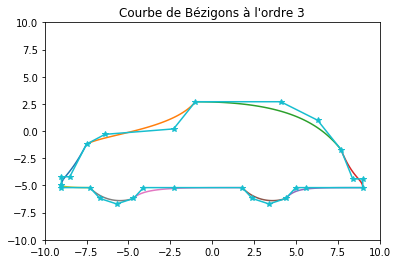

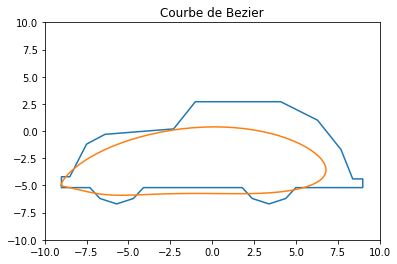

In [11]:
B=np.array([[-9,-9,-8.5,-7.5,-6.4,-2.3,-1,4.1,6.3,7.7,8.4,9,9,5.6,5,4.4,3.4,2.4,1.8,-2.3,-4.1,-4.7,-5.7,-6.7,-7.3,-9,-9],[-5,-4.2,-4.2,-1.2,-0.3,0.2,2.7,2.7,1,-1.7,-4.4,-4.4,-5.2,-5.2,-5.2,-6.2,-6.7,-6.2,-5.2,-5.2,-5.2,-6.2,-6.7,-6.2,-5.2,-5.2,-5]])

def pro_M (C,p):
    C2=np.copy(C)
    N=t.size
    n=np.size(C[0,:])
    '''Le nombre de sous groupe est égal à la partie entière supérieur de la'''
    '''division entre la dimention du tableau de point de contrôle et l'ordre -1'''
    nbr_sous_grp =  int(np.ceil(n/p))
    '''On calcule la différence entre le premier élèment du sous groupe'''
    '''nbr_sous_grp+1 et le dernier élément du dernier sous groupe pour savoir combien il en faut pour qu il soit complet'''
    reste=((nbr_sous_grp*(p+1))-nbr_sous_grp)-(n-1)
    for k in range(reste) :
        C2=np.insert(C2,np.size(C2[0,:]),C[:,n-1], axis=1)    
    T_final=np.zeros([2*nbr_sous_grp,N])
    temp=np.zeros([2,N])
    for i in range(nbr_sous_grp):
        j=(i*(p+1)-i)
        temp=Casteljau(C2[:,j:j+(p+1)])
        T_final[i*2,:]=temp[0,:]
        T_final[i*2+1,:]=temp[1,:]
        plt.plot(T_final[i*2,:],T_final[i*2+1,:])

pro_M(B,3)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title("Courbe de Bézigons à l'ordre 3")
plt.plot(B[0,:],B[1,:],"-*",label="Points de controle")
plt.show()

Courbe = Casteljau(B)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.plot(B[0,:],B[1,:],label="Points de controle")
plt.plot(Courbe[0,:],Courbe[1,:],label="Courbe")
plt.title("Courbe de Bezier")
plt.show()


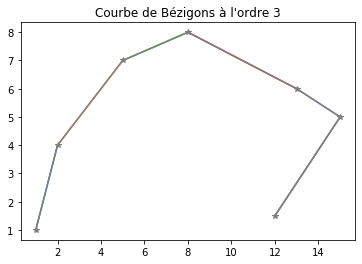

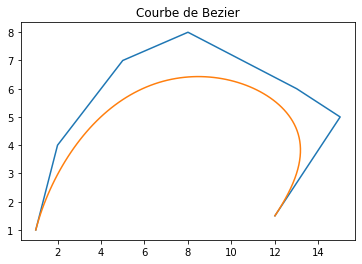

In [12]:
pro_M(C,1)
plt.title("Courbe de Bézigons à l'ordre 3")
plt.plot(C[0,:],C[1,:],"-*",label="Points de controle")
plt.show()

Courbe1 = Casteljau(C)
plt.plot(C[0,:],C[1,:],label="Points de controle")
plt.plot(Courbe1[0,:],Courbe1[1,:],label="Courbe")
plt.title("Courbe de Bezier")
plt.show()